This is the notebook used to train and load the PPO RL agent for this parking problem

First we will load the packages, and import the environment

In [1]:
import numpy as np
import sys
import gymnasium
import matplotlib.pyplot as plt
sys.modules["gym"] = gymnasium
from stable_baselines3 import PPO
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common import results_plotter
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnNoModelImprovement
from environment import CarParking

Then we establish the callback functions and the model used, which is the Proximal Policy Algorithm. Designed by OpenAI, it has proven to be very successful in various reinforcement learning problems, from controlling robots to playing complicated video games such as DOTA 2. It is a model-free, policy gradient reinforcement learning method. It can be considered an evolution from the traditional actor-critic model by making improvements in sample stability and stability. The name ‘proximal’ is due to the algorithm enforcing a constraint on the new policies learnt, ensuring that they are similar to the old policy, stabilising the learning process.


In [2]:
env = CarParking(60, 1_000) #creating an instance of the environment to run at 60fps with a maximum of 1000 timesteps per episode
env = Monitor(env, "./logs/") #will log results
stop_train_callback = StopTrainingOnNoModelImprovement(max_no_improvement_evals=4, min_evals=100, verbose=1) #stops the training when no improvement is detected
eval_callback = EvalCallback(env, best_model_save_path="./logs/",
                             log_path="./logs/", eval_freq=5_000,
                             deterministic=True, render=False, verbose=1, callback_after_eval=stop_train_callback) #evaluates the agent every 5000 timesteps and saves the results in the log folder

model = PPO("MlpPolicy", env, verbose=1, learning_rate=3e-4, batch_size=64, policy_kwargs=dict(net_arch=[64, 64])) #defining the PPO policy

Using cpu device
Wrapping the env in a DummyVecEnv.


In the above code, we are creating an instance of the environment to run at 60fps with a maximum of 1000 timesteps per episode. In addition we are using 2 callback functions: one to evaluate the performance of the agent every 5000 timesteps *(EvalCallback)* and the other to stop the training early if results do not improve *(StopTrainingOnNoModelImprovement)*. These are important as they allow for the monitoring of agent training and avoidance of redundant training.

Now, we will start training the model.

In [3]:
model.learn(total_timesteps=2_000_000, progress_bar=True, callback=eval_callback)

Output()

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 16.6     |
|    ep_rew_mean     | -1e+04   |
| time/              |          |
|    fps             | 60       |
|    iterations      | 1        |
|    time_elapsed    | 33       |
|    total_timesteps | 2048     |
---------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 11.5         |
|    ep_rew_mean          | -1e+04       |
| time/                   |              |
|    fps                  | 59           |
|    iterations           | 2            |
|    time_elapsed         | 68           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 8.825408e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.2         |
|    explained_variance   | 5.96e-08     |
|    learning_rate        | 0.0003       |
|    loss                 | 1.12e+07     |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.001       |
|    value_loss           | 3.22e+07     |
------------------------------------------


Eval num_timesteps=5000, episode_reward=-1000.00 +/- 0.00

Episode length: 1000.00 +/- 0.00

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 1e+03        |
|    mean_reward          | -1e+03       |
| time/                   |              |
|    total_timesteps      | 5000         |
| train/                  |              |
|    approx_kl            | 6.478632e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.2         |
|    explained_variance   | 1.79e-07     |
|    learning_rate        | 0.0003       |
|    loss                 | 1.97e+07     |
|    n_updates            | 20           |
|    policy_gradient_loss | -0.00143     |
|    value_loss           | 4.4e+07      |
------------------------------------------


New best mean reward!

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 18.2     |
|    ep_rew_mean     | -1e+04   |
| time/              |          |
|    fps             | 33       |
|    iterations      | 3        |
|    time_elapsed    | 185      |
|    total_timesteps | 6144     |
---------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 19.9          |
|    ep_rew_mean          | -9.92e+03     |
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 4             |
|    time_elapsed         | 220           |
|    total_timesteps      | 8192          |
| train/                  |               |
|    approx_kl            | 4.5320252e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.2          |
|    explained_variance   | 0             |
|    learning_rate        | 0.0003        |
|    loss                 | 1.59e+07      |
|    n_updates            | 30            |
|    policy_gradient_loss | -0.000653     |
|    value_loss           | 2.83e+07      |
-------------------------------------------


Eval num_timesteps=10000, episode_reward=-1000.00 +/- 0.00

Episode length: 1000.00 +/- 0.00

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 1e+03        |
|    mean_reward          | -1e+03       |
| time/                   |              |
|    total_timesteps      | 10000        |
| train/                  |              |
|    approx_kl            | 5.453601e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.2         |
|    explained_variance   | 5.96e-08     |
|    learning_rate        | 0.0003       |
|    loss                 | 8.18e+06     |
|    n_updates            | 40           |
|    policy_gradient_loss | -0.000686    |
|    value_loss           | 2.37e+07     |
------------------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 20.2      |
|    ep_rew_mean     | -9.92e+03 |
| time/              |           |
|    fps             | 30        |
|    iterations      | 5         |
|    time_elapsed    | 337       |
|    total_timesteps | 10240     |
----------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 19.1         |
|    ep_rew_mean          | -9.92e+03    |
| time/                   |              |
|    fps                  | 33           |
|    iterations           | 6            |
|    time_elapsed         | 372          |
|    total_timesteps      | 12288        |
| train/                  |              |
|    approx_kl            | 7.807178e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.2         |
|    explained_variance   | 1.79e-07     |
|    learning_rate        | 0.0003       |
|    loss                 | 8.97e+06     |
|    n_updates            | 50           |
|    policy_gradient_loss | -0.000856    |
|    value_loss           | 1.99e+07     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 18.9         |
|    ep_rew_mean          | -9.92e+03    |
| time/                   |              |
|    fps                  | 35           |
|    iterations           | 7            |
|    time_elapsed         | 406          |
|    total_timesteps      | 14336        |
| train/                  |              |
|    approx_kl            | 8.119305e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.2         |
|    explained_variance   | 0            |
|    learning_rate        | 0.0003       |
|    loss                 | 1.15e+07     |
|    n_updates            | 60           |
|    policy_gradient_loss | -0.000724    |
|    value_loss           | 1.77e+07     |
------------------------------------------


Eval num_timesteps=15000, episode_reward=-1000.00 +/- 0.00

Episode length: 1000.00 +/- 0.00

-------------------------------------------
| eval/                   |               |
|    mean_ep_length       | 1e+03         |
|    mean_reward          | -1e+03        |
| time/                   |               |
|    total_timesteps      | 15000         |
| train/                  |               |
|    approx_kl            | 0.00013935621 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.19         |
|    explained_variance   | 0             |
|    learning_rate        | 0.0003        |
|    loss                 | 6.89e+06      |
|    n_updates            | 70            |
|    policy_gradient_loss | -0.000901     |
|    value_loss           | 1.42e+07      |
-------------------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 28.9      |
|    ep_rew_mean     | -9.83e+03 |
| time/              |           |
|    fps             | 31        |
|    iterations      | 8         |
|    time_elapsed    | 524       |
|    total_timesteps | 16384     |
----------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 16.2          |
|    ep_rew_mean          | -1e+04        |
| time/                   |               |
|    fps                  | 32            |
|    iterations           | 9             |
|    time_elapsed         | 558           |
|    total_timesteps      | 18432         |
| train/                  |               |
|    approx_kl            | 3.2506854e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.19         |
|    explained_variance   | 0             |
|    learning_rate        | 0.0003        |
|    loss                 | 7.58e+06      |
|    n_updates            | 80            |
|    policy_gradient_loss | -0.000301     |
|    value_loss           | 1.91e+07      |
-------------------------------------------


Eval num_timesteps=20000, episode_reward=-1000.00 +/- 0.00

Episode length: 1000.00 +/- 0.00

-------------------------------------------
| eval/                   |               |
|    mean_ep_length       | 1e+03         |
|    mean_reward          | -1e+03        |
| time/                   |               |
|    total_timesteps      | 20000         |
| train/                  |               |
|    approx_kl            | 3.5613077e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.19         |
|    explained_variance   | 0             |
|    learning_rate        | 0.0003        |
|    loss                 | 1.71e+07      |
|    n_updates            | 90            |
|    policy_gradient_loss | -0.000648     |
|    value_loss           | 3.61e+07      |
-------------------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 21.1      |
|    ep_rew_mean     | -9.92e+03 |
| time/              |           |
|    fps             | 30        |
|    iterations      | 10        |
|    time_elapsed    | 675       |
|    total_timesteps | 20480     |
----------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 21.7          |
|    ep_rew_mean          | -9.92e+03     |
| time/                   |               |
|    fps                  | 31            |
|    iterations           | 11            |
|    time_elapsed         | 710           |
|    total_timesteps      | 22528         |
| train/                  |               |
|    approx_kl            | 6.4424035e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.19         |
|    explained_variance   | 0             |
|    learning_rate        | 0.0003        |
|    loss                 | 9.75e+06      |
|    n_updates            | 100           |
|    policy_gradient_loss | -0.000649     |
|    value_loss           | 1.79e+07      |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 40.7          |
|    ep_rew_mean          | -9.74e+03     |
| time/                   |               |
|    fps                  | 32            |
|    iterations           | 12            |
|    time_elapsed         | 745           |
|    total_timesteps      | 24576         |
| train/                  |               |
|    approx_kl            | 0.00013788641 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.19         |
|    explained_variance   | -1.19e-07     |
|    learning_rate        | 0.0003        |
|    loss                 | 3.73e+06      |
|    n_updates            | 110           |
|    policy_gradient_loss | -0.000877     |
|    value_loss           | 1.09e+07      |
-------------------------------------------


Eval num_timesteps=25000, episode_reward=-1000.00 +/- 0.00

Episode length: 1000.00 +/- 0.00

-------------------------------------------
| eval/                   |               |
|    mean_ep_length       | 1e+03         |
|    mean_reward          | -1e+03        |
| time/                   |               |
|    total_timesteps      | 25000         |
| train/                  |               |
|    approx_kl            | 7.1199436e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.19         |
|    explained_variance   | 1.19e-07      |
|    learning_rate        | 0.0003        |
|    loss                 | 1e+07         |
|    n_updates            | 120           |
|    policy_gradient_loss | -0.000587     |
|    value_loss           | 1.54e+07      |
-------------------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 41.5      |
|    ep_rew_mean     | -9.74e+03 |
| time/              |           |
|    fps             | 30        |
|    iterations      | 13        |
|    time_elapsed    | 862       |
|    total_timesteps | 26624     |
----------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 49.8        |
|    ep_rew_mean          | -9.65e+03   |
| time/                   |             |
|    fps                  | 31          |
|    iterations           | 14          |
|    time_elapsed         | 896         |
|    total_timesteps      | 28672       |
| train/                  |             |
|    approx_kl            | 9.25035e-05 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.19       |
|    explained_variance   | 0           |
|    learning_rate        | 0.0003      |
|    loss                 | 8.98e+06    |
|    n_updates            | 130         |
|    policy_gradient_loss | -0.000524   |
|    value_loss           | 1.05e+07    |
-----------------------------------------


Eval num_timesteps=30000, episode_reward=-1000.00 +/- 0.00

Episode length: 1000.00 +/- 0.00

-------------------------------------------
| eval/                   |               |
|    mean_ep_length       | 1e+03         |
|    mean_reward          | -1e+03        |
| time/                   |               |
|    total_timesteps      | 30000         |
| train/                  |               |
|    approx_kl            | 0.00013861901 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.19         |
|    explained_variance   | 0             |
|    learning_rate        | 0.0003        |
|    loss                 | 4.79e+06      |
|    n_updates            | 140           |
|    policy_gradient_loss | -0.000573     |
|    value_loss           | 9e+06         |
-------------------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 48.1      |
|    ep_rew_mean     | -9.65e+03 |
| time/              |           |
|    fps             | 30        |
|    iterations      | 15        |
|    time_elapsed    | 1014      |
|    total_timesteps | 30720     |
----------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 34.6          |
|    ep_rew_mean          | -9.83e+03     |
| time/                   |               |
|    fps                  | 31            |
|    iterations           | 16            |
|    time_elapsed         | 1049          |
|    total_timesteps      | 32768         |
| train/                  |               |
|    approx_kl            | 0.00015561486 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.19         |
|    explained_variance   | -1.19e-07     |
|    learning_rate        | 0.0003        |
|    loss                 | 8.22e+06      |
|    n_updates            | 150           |
|    policy_gradient_loss | -0.000801     |
|    value_loss           | 1.07e+07      |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 45.1         |
|    ep_rew_mean          | -9.74e+03    |
| time/                   |              |
|    fps                  | 32           |
|    iterations           | 17           |
|    time_elapsed         | 1083         |
|    total_timesteps      | 34816        |
| train/                  |              |
|    approx_kl            | 9.720668e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.18        |
|    explained_variance   | 0            |
|    learning_rate        | 0.0003       |
|    loss                 | 2.71e+06     |
|    n_updates            | 160          |
|    policy_gradient_loss | -0.000593    |
|    value_loss           | 1.16e+07     |
------------------------------------------


Eval num_timesteps=35000, episode_reward=-1000.00 +/- 0.00

Episode length: 1000.00 +/- 0.00

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 1e+03        |
|    mean_reward          | -1e+03       |
| time/                   |              |
|    total_timesteps      | 35000        |
| train/                  |              |
|    approx_kl            | 7.312157e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.18        |
|    explained_variance   | 0            |
|    learning_rate        | 0.0003       |
|    loss                 | 3.71e+06     |
|    n_updates            | 170          |
|    policy_gradient_loss | -0.000329    |
|    value_loss           | 8.62e+06     |
------------------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 44.8      |
|    ep_rew_mean     | -9.74e+03 |
| time/              |           |
|    fps             | 30        |
|    iterations      | 18        |
|    time_elapsed    | 1200      |
|    total_timesteps | 36864     |
----------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 36            |
|    ep_rew_mean          | -9.83e+03     |
| time/                   |               |
|    fps                  | 31            |
|    iterations           | 19            |
|    time_elapsed         | 1235          |
|    total_timesteps      | 38912         |
| train/                  |               |
|    approx_kl            | 0.00013429835 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.18         |
|    explained_variance   | -1.19e-07     |
|    learning_rate        | 0.0003        |
|    loss                 | 3.82e+06      |
|    n_updates            | 180           |
|    policy_gradient_loss | -0.000767     |
|    value_loss           | 1.01e+07      |
-------------------------------------------


Eval num_timesteps=40000, episode_reward=-1000.00 +/- 0.00

Episode length: 1000.00 +/- 0.00

-------------------------------------------
| eval/                   |               |
|    mean_ep_length       | 1e+03         |
|    mean_reward          | -1e+03        |
| time/                   |               |
|    total_timesteps      | 40000         |
| train/                  |               |
|    approx_kl            | 0.00014935198 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.18         |
|    explained_variance   | 1.19e-07      |
|    learning_rate        | 0.0003        |
|    loss                 | 9.49e+06      |
|    n_updates            | 190           |
|    policy_gradient_loss | -0.00114      |
|    value_loss           | 1.38e+07      |
-------------------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 44        |
|    ep_rew_mean     | -9.74e+03 |
| time/              |           |
|    fps             | 30        |
|    iterations      | 20        |
|    time_elapsed    | 1352      |
|    total_timesteps | 40960     |
----------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 61.7        |
|    ep_rew_mean          | -9.56e+03   |
| time/                   |             |
|    fps                  | 31          |
|    iterations           | 21          |
|    time_elapsed         | 1387        |
|    total_timesteps      | 43008       |
| train/                  |             |
|    approx_kl            | 0.001375611 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.18       |
|    explained_variance   | 0           |
|    learning_rate        | 0.0003      |
|    loss                 | 3.51e+06    |
|    n_updates            | 200         |
|    policy_gradient_loss | -0.000855   |
|    value_loss           | 4.22e+06    |
-----------------------------------------


Eval num_timesteps=45000, episode_reward=-10509.43 +/- 1.59

Episode length: 103.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 103         |
|    mean_reward          | -1.05e+04   |
| time/                   |             |
|    total_timesteps      | 45000       |
| train/                  |             |
|    approx_kl            | 0.010271337 |
|    clip_fraction        | 0.0907      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.17       |
|    explained_variance   | 5.96e-08    |
|    learning_rate        | 0.0003      |
|    loss                 | 7.78e+05    |
|    n_updates            | 210         |
|    policy_gradient_loss | -0.000694   |
|    value_loss           | 9.08e+05    |
-----------------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 71.2      |
|    ep_rew_mean     | -9.47e+03 |
| time/              |           |
|    fps             | 31        |
|    iterations      | 22        |
|    time_elapsed    | 1430      |
|    total_timesteps | 45056     |
----------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 18.8         |
|    ep_rew_mean          | -9.92e+03    |
| time/                   |              |
|    fps                  | 32           |
|    iterations           | 23           |
|    time_elapsed         | 1464         |
|    total_timesteps      | 47104        |
| train/                  |              |
|    approx_kl            | 3.541744e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.17        |
|    explained_variance   | -1.19e-07    |
|    learning_rate        | 0.0003       |
|    loss                 | 1.9e+06      |
|    n_updates            | 220          |
|    policy_gradient_loss | -7.4e-05     |
|    value_loss           | 7.6e+06      |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 38.8         |
|    ep_rew_mean          | -9.74e+03    |
| time/                   |              |
|    fps                  | 32           |
|    iterations           | 24           |
|    time_elapsed         | 1499         |
|    total_timesteps      | 49152        |
| train/                  |              |
|    approx_kl            | 8.728151e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.17        |
|    explained_variance   | 0            |
|    learning_rate        | 0.0003       |
|    loss                 | 1.19e+07     |
|    n_updates            | 230          |
|    policy_gradient_loss | -0.000287    |
|    value_loss           | 1.87e+07     |
------------------------------------------


Eval num_timesteps=50000, episode_reward=-997.56 +/- 0.12

Episode length: 1000.00 +/- 0.00

-------------------------------------------
| eval/                   |               |
|    mean_ep_length       | 1e+03         |
|    mean_reward          | -998          |
| time/                   |               |
|    total_timesteps      | 50000         |
| train/                  |               |
|    approx_kl            | 1.0811666e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.17         |
|    explained_variance   | 0             |
|    learning_rate        | 0.0003        |
|    loss                 | 1.87e+06      |
|    n_updates            | 240           |
|    policy_gradient_loss | -0.000118     |
|    value_loss           | 7.67e+06      |
-------------------------------------------


New best mean reward!

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 48.6      |
|    ep_rew_mean     | -9.65e+03 |
| time/              |           |
|    fps             | 31        |
|    iterations      | 25        |
|    time_elapsed    | 1616      |
|    total_timesteps | 51200     |
----------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 68.5          |
|    ep_rew_mean          | -9.47e+03     |
| time/                   |               |
|    fps                  | 32            |
|    iterations           | 26            |
|    time_elapsed         | 1650          |
|    total_timesteps      | 53248         |
| train/                  |               |
|    approx_kl            | 3.3459975e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.17         |
|    explained_variance   | 0             |
|    learning_rate        | 0.0003        |
|    loss                 | 7.87e+05      |
|    n_updates            | 250           |
|    policy_gradient_loss | -0.000197     |
|    value_loss           | 4.63e+06      |
-------------------------------------------


Eval num_timesteps=55000, episode_reward=-10510.28 +/- 1.76

Episode length: 103.00 +/- 0.00

-------------------------------------------
| eval/                   |               |
|    mean_ep_length       | 103           |
|    mean_reward          | -1.05e+04     |
| time/                   |               |
|    total_timesteps      | 55000         |
| train/                  |               |
|    approx_kl            | 0.00028450557 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.17         |
|    explained_variance   | 0             |
|    learning_rate        | 0.0003        |
|    loss                 | 1.35e+06      |
|    n_updates            | 260           |
|    policy_gradient_loss | 0.000291      |
|    value_loss           | 2.2e+06       |
-------------------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 69.8      |
|    ep_rew_mean     | -9.47e+03 |
| time/              |           |
|    fps             | 32        |
|    iterations      | 27        |
|    time_elapsed    | 1693      |
|    total_timesteps | 55296     |
----------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 71           |
|    ep_rew_mean          | -9.47e+03    |
| time/                   |              |
|    fps                  | 33           |
|    iterations           | 28           |
|    time_elapsed         | 1728         |
|    total_timesteps      | 57344        |
| train/                  |              |
|    approx_kl            | 6.095285e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.16        |
|    explained_variance   | 0            |
|    learning_rate        | 0.0003       |
|    loss                 | 4.72e+06     |
|    n_updates            | 270          |
|    policy_gradient_loss | -0.000461    |
|    value_loss           | 6.74e+06     |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 80.6          |
|    ep_rew_mean          | -9.38e+03     |
| time/                   |               |
|    fps                  | 33            |
|    iterations           | 29            |
|    time_elapsed         | 1763          |
|    total_timesteps      | 59392         |
| train/                  |               |
|    approx_kl            | 9.3267474e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.16         |
|    explained_variance   | 0             |
|    learning_rate        | 0.0003        |
|    loss                 | 2.38e+06      |
|    n_updates            | 280           |
|    policy_gradient_loss | -0.000517     |
|    value_loss           | 4.99e+06      |
-------------------------------------------


Eval num_timesteps=60000, episode_reward=-10510.13 +/- 1.39

Episode length: 103.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 103         |
|    mean_reward          | -1.05e+04   |
| time/                   |             |
|    total_timesteps      | 60000       |
| train/                  |             |
|    approx_kl            | 0.014744048 |
|    clip_fraction        | 0.121       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.13       |
|    explained_variance   | 0           |
|    learning_rate        | 0.0003      |
|    loss                 | 126         |
|    n_updates            | 290         |
|    policy_gradient_loss | -0.00446    |
|    value_loss           | 1.45e+06    |
-----------------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 100      |
|    ep_rew_mean     | -9.2e+03 |
| time/              |          |
|    fps             | 34       |
|    iterations      | 30       |
|    time_elapsed    | 1806     |
|    total_timesteps | 61440    |
---------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 121          |
|    ep_rew_mean          | -9.02e+03    |
| time/                   |              |
|    fps                  | 34           |
|    iterations           | 31           |
|    time_elapsed         | 1840         |
|    total_timesteps      | 63488        |
| train/                  |              |
|    approx_kl            | 0.0003085723 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.12        |
|    explained_variance   | 0            |
|    learning_rate        | 0.0003       |
|    loss                 | 2.46e+06     |
|    n_updates            | 300          |
|    policy_gradient_loss | -0.000902    |
|    value_loss           | 3.49e+06     |
------------------------------------------


Eval num_timesteps=65000, episode_reward=-10509.86 +/- 2.07

Episode length: 103.00 +/- 0.00

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 103          |
|    mean_reward          | -1.05e+04    |
| time/                   |              |
|    total_timesteps      | 65000        |
| train/                  |              |
|    approx_kl            | 0.0009027665 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.11        |
|    explained_variance   | -1.19e-07    |
|    learning_rate        | 0.0003       |
|    loss                 | 8.37e+05     |
|    n_updates            | 310          |
|    policy_gradient_loss | -0.000658    |
|    value_loss           | 2.41e+06     |
------------------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 101      |
|    ep_rew_mean     | -9.2e+03 |
| time/              |          |
|    fps             | 34       |
|    iterations      | 32       |
|    time_elapsed    | 1883     |
|    total_timesteps | 65536    |
---------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 120         |
|    ep_rew_mean          | -9.02e+03   |
| time/                   |             |
|    fps                  | 35          |
|    iterations           | 33          |
|    time_elapsed         | 1918        |
|    total_timesteps      | 67584       |
| train/                  |             |
|    approx_kl            | 0.002721207 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.11       |
|    explained_variance   | 0           |
|    learning_rate        | 0.0003      |
|    loss                 | 2.81e+06    |
|    n_updates            | 320         |
|    policy_gradient_loss | 0.000189    |
|    value_loss           | 3.66e+06    |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 130          |
|    ep_rew_mean          | -8.93e+03    |
| time/                   |              |
|    fps                  | 35           |
|    iterations           | 34           |
|    time_elapsed         | 1952         |
|    total_timesteps      | 69632        |
| train/                  |              |
|    approx_kl            | 0.0009846198 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.11        |
|    explained_variance   | 0            |
|    learning_rate        | 0.0003       |
|    loss                 | 1.33e+06     |
|    n_updates            | 330          |
|    policy_gradient_loss | -0.00139     |
|    value_loss           | 1.47e+06     |
------------------------------------------


Eval num_timesteps=70000, episode_reward=-1000.00 +/- 0.00

Episode length: 1000.00 +/- 0.00

-------------------------------------------
| eval/                   |               |
|    mean_ep_length       | 1e+03         |
|    mean_reward          | -1e+03        |
| time/                   |               |
|    total_timesteps      | 70000         |
| train/                  |               |
|    approx_kl            | 9.9246536e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.11         |
|    explained_variance   | 0             |
|    learning_rate        | 0.0003        |
|    loss                 | 2.11e+06      |
|    n_updates            | 340           |
|    policy_gradient_loss | -0.000271     |
|    value_loss           | 4.49e+06      |
-------------------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 130       |
|    ep_rew_mean     | -8.93e+03 |
| time/              |           |
|    fps             | 34        |
|    iterations      | 35        |
|    time_elapsed    | 2069      |
|    total_timesteps | 71680     |
----------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 149         |
|    ep_rew_mean          | -8.75e+03   |
| time/                   |             |
|    fps                  | 35          |
|    iterations           | 36          |
|    time_elapsed         | 2106        |
|    total_timesteps      | 73728       |
| train/                  |             |
|    approx_kl            | 0.012039214 |
|    clip_fraction        | 0.0359      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.12       |
|    explained_variance   | 0           |
|    learning_rate        | 0.0003      |
|    loss                 | 1.9e+05     |
|    n_updates            | 350         |
|    policy_gradient_loss | -0.00295    |
|    value_loss           | 9.02e+05    |
-----------------------------------------


Eval num_timesteps=75000, episode_reward=-10395.95 +/- 3.68

Episode length: 90.00 +/- 0.00

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 90           |
|    mean_reward          | -1.04e+04    |
| time/                   |              |
|    total_timesteps      | 75000        |
| train/                  |              |
|    approx_kl            | 1.620318e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.16        |
|    explained_variance   | 5.96e-08     |
|    learning_rate        | 0.0003       |
|    loss                 | 5.67e+05     |
|    n_updates            | 360          |
|    policy_gradient_loss | -0.000121    |
|    value_loss           | 3.73e+06     |
------------------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 129       |
|    ep_rew_mean     | -8.93e+03 |
| time/              |           |
|    fps             | 35        |
|    iterations      | 37        |
|    time_elapsed    | 2149      |
|    total_timesteps | 75776     |
----------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 69.8         |
|    ep_rew_mean          | -9.47e+03    |
| time/                   |              |
|    fps                  | 35           |
|    iterations           | 38           |
|    time_elapsed         | 2184         |
|    total_timesteps      | 77824        |
| train/                  |              |
|    approx_kl            | 0.0028726212 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.16        |
|    explained_variance   | 0            |
|    learning_rate        | 0.0003       |
|    loss                 | 1.76e+06     |
|    n_updates            | 370          |
|    policy_gradient_loss | 0.000344     |
|    value_loss           | 3.58e+06     |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 89.1          |
|    ep_rew_mean          | -9.29e+03     |
| time/                   |               |
|    fps                  | 35            |
|    iterations           | 39            |
|    time_elapsed         | 2219          |
|    total_timesteps      | 79872         |
| train/                  |               |
|    approx_kl            | 1.0538206e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.17         |
|    explained_variance   | 0             |
|    learning_rate        | 0.0003        |
|    loss                 | 5.62e+06      |
|    n_updates            | 380           |
|    policy_gradient_loss | -7.67e-05     |
|    value_loss           | 1.32e+07      |
-------------------------------------------


Eval num_timesteps=80000, episode_reward=-10511.08 +/- 1.79

Episode length: 103.00 +/- 0.00

-------------------------------------------
| eval/                   |               |
|    mean_ep_length       | 103           |
|    mean_reward          | -1.05e+04     |
| time/                   |               |
|    total_timesteps      | 80000         |
| train/                  |               |
|    approx_kl            | 0.00013110272 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.17         |
|    explained_variance   | 0             |
|    learning_rate        | 0.0003        |
|    loss                 | 265           |
|    n_updates            | 390           |
|    policy_gradient_loss | -0.000132     |
|    value_loss           | 8.19e+05      |
-------------------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 78.7      |
|    ep_rew_mean     | -9.38e+03 |
| time/              |           |
|    fps             | 36        |
|    iterations      | 40        |
|    time_elapsed    | 2263      |
|    total_timesteps | 81920     |
----------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 79.3          |
|    ep_rew_mean          | -9.38e+03     |
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 41            |
|    time_elapsed         | 2298          |
|    total_timesteps      | 83968         |
| train/                  |               |
|    approx_kl            | 1.5645492e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.17         |
|    explained_variance   | 0             |
|    learning_rate        | 0.0003        |
|    loss                 | 1.73e+06      |
|    n_updates            | 400           |
|    policy_gradient_loss | -2.85e-05     |
|    value_loss           | 3e+06         |
-------------------------------------------


Eval num_timesteps=85000, episode_reward=-10509.13 +/- 1.37

Episode length: 103.00 +/- 0.00

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 103          |
|    mean_reward          | -1.05e+04    |
| time/                   |              |
|    total_timesteps      | 85000        |
| train/                  |              |
|    approx_kl            | 3.780704e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.17        |
|    explained_variance   | 0            |
|    learning_rate        | 0.0003       |
|    loss                 | 2.24e+06     |
|    n_updates            | 410          |
|    policy_gradient_loss | -0.000108    |
|    value_loss           | 5.83e+06     |
------------------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 89.9      |
|    ep_rew_mean     | -9.29e+03 |
| time/              |           |
|    fps             | 36        |
|    iterations      | 42        |
|    time_elapsed    | 2341      |
|    total_timesteps | 86016     |
----------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 90.4          |
|    ep_rew_mean          | -9.29e+03     |
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 43            |
|    time_elapsed         | 2376          |
|    total_timesteps      | 88064         |
| train/                  |               |
|    approx_kl            | 7.0384413e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.17         |
|    explained_variance   | 0             |
|    learning_rate        | 0.0003        |
|    loss                 | 3.49e+06      |
|    n_updates            | 420           |
|    policy_gradient_loss | -0.000146     |
|    value_loss           | 4.6e+06       |
-------------------------------------------


Eval num_timesteps=90000, episode_reward=-10509.55 +/- 1.13

Episode length: 103.00 +/- 0.00

----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 103        |
|    mean_reward          | -1.05e+04  |
| time/                   |            |
|    total_timesteps      | 90000      |
| train/                  |            |
|    approx_kl            | 4.7707e-06 |
|    clip_fraction        | 0          |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.17      |
|    explained_variance   | 5.96e-08   |
|    learning_rate        | 0.0003     |
|    loss                 | 3.36e+06   |
|    n_updates            | 430        |
|    policy_gradient_loss | -0.000147  |
|    value_loss           | 9.22e+06   |
----------------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 59.5      |
|    ep_rew_mean     | -9.56e+03 |
| time/              |           |
|    fps             | 37        |
|    iterations      | 44        |
|    time_elapsed    | 2419      |
|    total_timesteps | 90112     |
----------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 69.6          |
|    ep_rew_mean          | -9.47e+03     |
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 45            |
|    time_elapsed         | 2454          |
|    total_timesteps      | 92160         |
| train/                  |               |
|    approx_kl            | 4.3316977e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.17         |
|    explained_variance   | 5.96e-08      |
|    learning_rate        | 0.0003        |
|    loss                 | 6.16e+06      |
|    n_updates            | 440           |
|    policy_gradient_loss | -0.000141     |
|    value_loss           | 9.21e+06      |
-------------------------------------------


--------------------------------------------
| rollout/                |                |
|    ep_len_mean          | 79.5           |
|    ep_rew_mean          | -9.38e+03      |
| time/                   |                |
|    fps                  | 37             |
|    iterations           | 46             |
|    time_elapsed         | 2489           |
|    total_timesteps      | 94208          |
| train/                  |                |
|    approx_kl            | 0.000114633935 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -2.17          |
|    explained_variance   | -1.19e-07      |
|    learning_rate        | 0.0003         |
|    loss                 | 483            |
|    n_updates            | 450            |
|    policy_gradient_loss | -0.000138      |
|    value_loss           | 1.27e+06       |
--------------------------------------------


Eval num_timesteps=95000, episode_reward=-10511.06 +/- 0.82

Episode length: 103.00 +/- 0.00

-------------------------------------------
| eval/                   |               |
|    mean_ep_length       | 103           |
|    mean_reward          | -1.05e+04     |
| time/                   |               |
|    total_timesteps      | 95000         |
| train/                  |               |
|    approx_kl            | 0.00014928446 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.17         |
|    explained_variance   | 0             |
|    learning_rate        | 0.0003        |
|    loss                 | 1.13e+06      |
|    n_updates            | 460           |
|    policy_gradient_loss | -0.000289     |
|    value_loss           | 2.01e+06      |
-------------------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 89.1      |
|    ep_rew_mean     | -9.29e+03 |
| time/              |           |
|    fps             | 38        |
|    iterations      | 47        |
|    time_elapsed    | 2532      |
|    total_timesteps | 96256     |
----------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 90.6         |
|    ep_rew_mean          | -9.29e+03    |
| time/                   |              |
|    fps                  | 38           |
|    iterations           | 48           |
|    time_elapsed         | 2567         |
|    total_timesteps      | 98304        |
| train/                  |              |
|    approx_kl            | 6.379766e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.16        |
|    explained_variance   | 5.96e-08     |
|    learning_rate        | 0.0003       |
|    loss                 | 3.52e+06     |
|    n_updates            | 470          |
|    policy_gradient_loss | -0.000355    |
|    value_loss           | 3.7e+06      |
------------------------------------------


In the code block above, the model is learning for up to 2 million steps. However, the callback function provided by Stable Baseline3 will start evaluating after 100 evaluations (500,000 steps) if the model is improving or not. If the model does not improve after 4 evaluations, the model will stop learning.

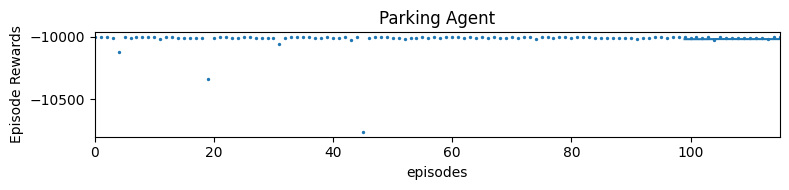

In [ ]:
results_plotter.plot_results(
    ['./logs/'], 2_000_000, results_plotter.X_EPISODES, "Parking Agent"
)

Here are the results